In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [79]:
# append day-1 and day-2
# features = features + pd.read_csv('data/round_1/prices_round_1_day_-1.csv', delimiter=";") + pd.read_csv('data/round_1/prices_round_1_day_-2.csv', delimiter=";")



day_n2 = pd.read_csv('data/round_1/prices_round_1_day_-2.csv', delimiter=';')
# Only keep symbol STARFRUIT
day_n2 = day_n2[day_n2['product'] == 'STARFRUIT']

day_n1 = pd.read_csv('data/round_1/prices_round_1_day_-1.csv', delimiter=';')
# Only keep symbol STARFRUIT
day_n1 = day_n1[day_n1['product'] == 'STARFRUIT']
day_n1['timestamp'] += day_n2['timestamp'].iloc[-1]

features = pd.read_csv('data/round_1/prices_round_1_day_0.csv', delimiter=';')
features = features[features['product'] == 'STARFRUIT']
features['timestamp'] += day_n1['timestamp'].iloc[-1]


features = pd.concat([day_n2,  day_n1,  features,])


# delete day_n1 and day_n2
del day_n1
del day_n2


features.tail()


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
19990,0,2999300,STARFRUIT,5049,28,NaN,NaN,NaN,NaN,5056,28,NaN,NaN,NaN,NaN,5052.5,0.0
19992,0,2999400,STARFRUIT,5048,9,5047.0,27.0,NaN,NaN,5054,29,NaN,NaN,NaN,NaN,5051.0,0.0
19995,0,2999500,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,2999600,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19998,0,2999700,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [80]:

trades_n2 = pd.read_csv('data/round_1/trades_round_1_day_-2_nn.csv', delimiter=';')
trades_n2 = trades_n2[trades_n2['symbol'] == 'STARFRUIT']


trades_n1 = pd.read_csv('data/round_1/trades_round_1_day_-1_nn.csv', delimiter=';')
trades_n1 = trades_n1[trades_n1['symbol'] == 'STARFRUIT']
trades_n1['timestamp'] += trades_n2['timestamp'].iloc[-1]

trades = pd.read_csv('data/round_1/trades_round_1_day_0_nn.csv', delimiter=';')
trades['timestamp'] += trades_n1['timestamp'].iloc[-1]

trades = pd.concat([trades_n2, trades_n1, trades])

# # drop buyer and seller
trades = trades.drop(columns=['buyer', 'seller', 'currency'])
trades = trades[trades["symbol"] == "STARFRUIT"]




trades.tail()

,timestamp,symbol,price,quantity
5310,2997900,STARFRUIT,5050.0,3
5311,2998100,STARFRUIT,5055.0,1
5312,2998200,STARFRUIT,5050.0,1
5315,2998900,STARFRUIT,5049.0,2
5316,2999000,STARFRUIT,5048.0,1


In [81]:
# only include rows with product = STARFRUIT
features = features[features["product"] == "STARFRUIT"]


features = features.drop(columns=["day"])

features = features.drop(columns=["profit_and_loss"])

# split data based on the product column
features.head()

,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price
1,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0
3,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0
4,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0
7,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,NaN,NaN,NaN,NaN,4999.5
9,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,NaN,NaN,NaN,NaN,4998.5


In [82]:

# features['mid_price'] = (features['bid_price_1'] + features['ask_price_1']) / 2

# features["spread"] = features["ask_price_1"] - features["bid_price_1"]

# # calculate KDJ
# # https://www.liberatedstocktrader.com/kdj-indicator/
# features['low_10'] = features['bid_price_1'].rolling(window=10).min()
# features['high_10'] = features['ask_price_1'].rolling(window=10).max()

# # features['K'] = (features['mid_price'] - features['low_10']) / (features['high_10'] - features['low_10'])

# # features['D'] = features['K'].rolling(window=10).mean()

# # features['J'] = 3 * features['K'] - 2 * features['D']

# # Calculate Kalman Filter
# # https://en.wikipedia.org/wiki/Kalman_filter
# # https://www.quantstart.com/articles/kalman-filter-based-pairs-trading-strategy-in-qstrader/
# # https://www.quantstart.com/articles/kalman-filter-based-time-series-analysis-in-python/

# features['kalman_prediction'] = features['mid_price']
# features['kalman_gain'] = 0
# features['kalman_variance'] = 0
# features['kalman_prediction'].iloc[0] = features['mid_price'].iloc[0]
# features['kalman_variance'].iloc[0] = 1

# for i in range(1, len(features)):
#     # prediction
#     features['kalman_prediction'].iloc[i] = features['kalman_prediction'].iloc[i-1]
#     features['kalman_variance'].iloc[i] = features['kalman_variance'].iloc[i-1] + 1

#     # gain
#     kalman_gain = features['kalman_variance'].iloc[i] / (features['kalman_variance'].iloc[i] + 1)
#     features['kalman_gain'].iloc[i] = kalman_gain

#     # update
#     features['kalman_prediction'].iloc[i] = features['kalman_prediction'].iloc[i] + kalman_gain * (features['mid_price'].iloc[i] - features['kalman_prediction'].iloc[i])
#     features['kalman_variance'].iloc[i] = (1 - kalman_gain) * features['kalman_variance'].iloc[i]

# features['kalman_prediction_error'] = features['mid_price'] - features['kalman_prediction']



# features = features.drop(columns=["low_10", "high_10"])

# features.head()

In [83]:
# # calculate RSI
# # https://www.investopedia.com/terms/r/rsi.asp
# delta = features['mid_price'].diff()
# gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()

# features['RS'] = gain / loss
# features['RSI'] = 100 - (100 / (1 + features['RS']))


# # calculate exponential moving average
# features['ema_10'] = features['mid_price'].ewm(span=10, adjust=False).mean()


# # best bid is the bid price with highest volume
# features["best_bid"] = np.where(features['bid_volume_1'] > features['bid_volume_2'], np.where(features['bid_volume_1'] > features['bid_volume_3'], features['bid_price_1'], features['bid_price_3']), np.where(features['bid_volume_2'] > features['bid_volume_3'], features['bid_price_2'], features['bid_price_3']))

# # # Replace ask_price_2, ask_volume_2, ask_price_3 and ask_volume_3 that are NaN with 0
# features['ask_price_2'] = features['ask_price_2'].fillna(0)
# features['ask_volume_2'] = features['ask_volume_2'].fillna(0)
# features['ask_price_3'] = features['ask_price_3'].fillna(0)
# features['ask_volume_3'] = features['ask_volume_3'].fillna(0)


# # calculate PVT
# # https://www.investopedia.com/terms/p/pricelinevolume.asp
# features['PVT'] = features['mid_price'].pct_change() * features['bid_volume_1'].shift(10)
# features['PVT'] = features['PVT'].cumsum()



# # best ask is ask with highest volume
# features["best_ask"] = np.where(features['ask_volume_1'] > features['ask_volume_2'], 
#                     np.where(features['ask_volume_1'] > features['ask_volume_3'], features['ask_price_1'], 
#                              features['ask_price_3']), 
#                     np.where(features['ask_volume_2'] > features['ask_volume_3'], features['ask_price_2'], 
#                              features['ask_price_3']))

# features['best_price'] = (features['best_bid'] + features['best_ask']) / 2




In [84]:
# calculate the  Williams Percent Range 
# https://www.investopedia.com/terms/w/williamsr.asp

# features['highest_high'] = features['ask_price_1'].rolling(window=100).max()
# features['lowest_low'] = features['bid_price_1'].rolling(window=100).min()

# features['WPR'] = (features['highest_high'] - features['mid_price']) / (features['highest_high'] - features['lowest_low'])



In [85]:
# # calculate the Chande Momentum Oscillator 
# # https://www.investopedia.com/terms/c/com.asp

# features['CMO'] = (features['mid_price'] - features['mid_price'].shift(14)) / (features['mid_price'] + features['mid_price'].shift(14))


In [86]:
# calculate the Stochastic Oscillator Indicator
# https://www.investopedia.com/terms/s/stochasticoscillator.asp

# features['lowest_low'] = features['mid_price'].rolling(window=200).min()
# features['highest_high'] = features['mid_price'].rolling(window=200).max()

# features['SOI'] = (features['mid_price'] - features['lowest_low']) / (features['highest_high'] - features['lowest_low'])

In [87]:
# # calculate the True Strength Index

# features['delta'] = features['mid_price'].diff()
# features['delta'] = features['delta'].fillna(0)

# features['delta_up'] = features['delta'].where(features['delta'] > 0, 0)
# features['delta_down'] = -features['delta'].where(features['delta'] < 0, 0)

# features['EMA_up'] = features['delta_up'].ewm(span=14, adjust=False).mean()
# features['EMA_down'] = features['delta_down'].ewm(span=14, adjust=False).mean()

# features['RS'] = features['EMA_up'] / features['EMA_down']

# features['TSI'] = 100 * features['RS'].ewm(span=25, adjust=False).mean()

# features['TSI'] = features['TSI'].fillna(0)


In [88]:
# #calculate the Aroon Oscillator 

# features['aroon_up'] = features['mid_price'].rolling(window=25).apply(lambda x: x.argmax()) / 25 * 100
# features['aroon_down'] = features['mid_price'].rolling(window=25).apply(lambda x: x.argmin()) / 25 * 100

# features['aroon_oscillator'] = features['aroon_up'] - features['aroon_down']


In [89]:
# # Calculate Commodity Channel Index 

# features['typical_price'] = (features['mid_price'] + features['ask_price_1'] + features['bid_price_1']) / 3

# features['mean_deviation'] = (features['typical_price'] - features['typical_price'].rolling(window=20).mean()).abs()

# features['CCI'] = (features['typical_price'] - features['typical_price'].rolling(window=20).mean()) / (0.015 * features['mean_deviation'])

In [90]:
# # calculate A/D Oscillator

# features['A/D'] = (features['mid_price'] - features['bid_price_1']) / (features['ask_price_1'] - features['bid_price_1'])

In [91]:
# # calculate the Standard Deviation Indicator

# features['std'] = features['mid_price'].rolling(window=20).std()

# # calculate the Momentum Indicator

# features['momentum'] = features['mid_price'] - features['mid_price'].shift(4)

# # calculate the Rate of Change

# features['ROC'] = features['mid_price'].pct_change(4)

# # calculate the Price Volume Trend

# features['PVT'] = features['mid_price'].pct_change() * features['bid_volume_1'].shift(10)

# features['PVT'] = features['PVT'].cumsum()





In [92]:
# # calculate the Accumulation Distribution Line

# features['ADL'] = (features['mid_price'] - features['bid_price_1']) / (features['ask_price_1'] - features['bid_price_1'])

# features["ADL"] = features["ADL"].fillna(0)
# # calculate the Accumulation Distribution Oscillator

# features['ADO'] = features['ADL'].rolling(window=20).mean()

# features["ADO"]


In [93]:
# # calculate Ichimoku cloud indicator

# features['conversion_line'] = (features['mid_price'].rolling(window=9).max() + features['mid_price'].rolling(window=9).min()) / 2

# features['base_line'] = (features['mid_price'].rolling(window=26).max() + features['mid_price'].rolling(window=26).min()) / 2

# features['leading_span_A'] = ((features['conversion_line'] + features['base_line']) / 2).shift(26)

# features['leading_span_B'] = ((features['mid_price'].rolling(window=52).max() + features['mid_price'].rolling(window=52).min()) / 2).shift(26)

# features['lagging_span'] = features['mid_price'].shift(-26)

# features['ichimoku_cloud'] = features['leading_span_A'] - features['leading_span_B']


In [94]:
features["tot_vol"] = features["bid_volume_1"] + features["bid_volume_2"] + features["bid_volume_3"] + features["ask_volume_1"] + features["ask_volume_2"] + features["ask_volume_3"]


features["b1_va1_index"] = features["bid_price_1"] * features["ask_volume_1"]
features["b2_va2_index"] = features["bid_price_2"] * features["ask_volume_2"]
features["b3_va3_index"] = features["bid_price_3"] * features["ask_volume_3"]

features["a1_vb1_index"] = features["ask_price_1"] * features["bid_volume_1"]
features["a2_vb2_index"] = features["ask_price_2"] * features["bid_volume_2"]
features["a3_vb3_index"] = features["ask_price_3"] * features["bid_volume_3"]


features.head()


,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,...,ask_price_3,ask_volume_3,mid_price,tot_vol,b1_va1_index,b2_va2_index,b3_va3_index,a1_vb1_index,a2_vb2_index,a3_vb3_index
1,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,...,NaN,NaN,5000.0,NaN,129922,NaN,NaN,130078,NaN,NaN
3,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,...,NaN,NaN,5002.0,NaN,100000,NaN,NaN,25020,NaN,NaN
4,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,...,NaN,NaN,5000.0,NaN,154907,NaN,NaN,5003,NaN,NaN
7,300,STARFRUIT,4996,27,NaN,NaN,NaN,NaN,5003,27,...,NaN,NaN,4999.5,NaN,134892,NaN,NaN,135081,NaN,NaN
9,400,STARFRUIT,4995,20,NaN,NaN,NaN,NaN,5002,20,...,NaN,NaN,4998.5,NaN,99900,NaN,NaN,100040,NaN,NaN


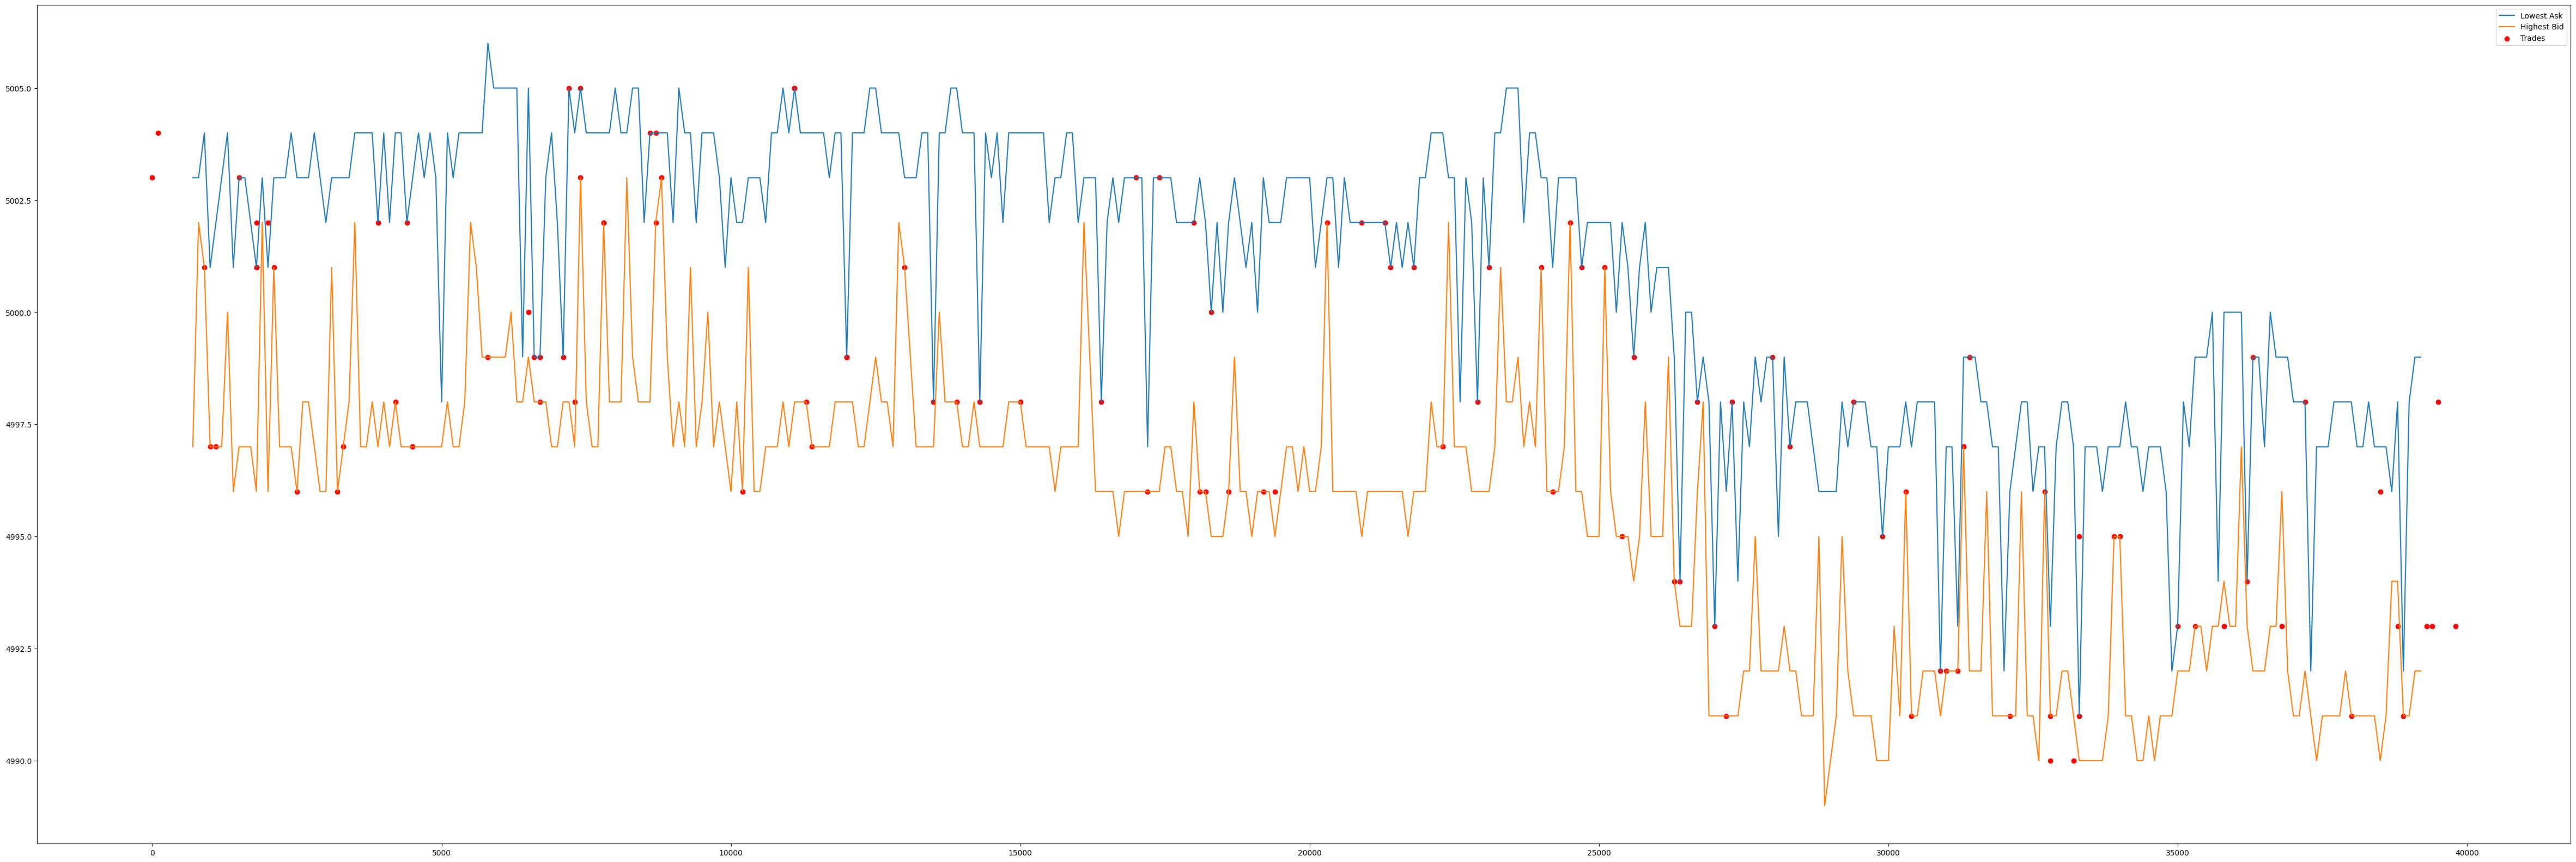

In [101]:

# remove the first 10 rows
features = features[0:1000]

# drop all trades after timestamp 40000
trades = trades[trades['timestamp'] < 100000]

# drop first and last row
features = features.iloc[1:-1]


fig, subplt = plt.subplots(1, figsize=(60, 20))

# plot lowest ask, highest bid, mid price and best price
plt.plot(features['timestamp'], features['ask_price_1'], label='Lowest Ask')
plt.plot(features['timestamp'], features['bid_price_1'], label='Highest Bid')
# plot the trades
plt.scatter(trades['timestamp'], trades['price'], color='red', label='Trades')
plt.legend()
plt.show()


# plot the trades in red
# subplt[0].scatter(features['timestamp'], features['trade_price'], color='red', label='Trades')

# subplt.plot(features['timestamp'], features['mid_price'], label='Mid Price')
# subplt[0].legend()

# plot kalman filter
# subplt[1].plot(features['timestamp'], features['mid_price'], label='Mid Price')
# subplt[1].plot(features['timestamp'], features['kalman_prediction'], label='Kalman Prediction')
# subplt[1].legend()


# # plot the CCI
# subplt[1].plot(features['timestamp'], features['b1_va1_index'], label='b1_va1_index"')
# subplt[1].plot(features['timestamp'], features['b2_va2_index'], label='b2_va2_index')
# subplt[1].plot(features['timestamp'], features['b3_va3_index'], label='b3_va3_index')
# subplt[1].plot(features['timestamp'], features['a1_vb1_index'], label='a1_vb1_index')
# subplt[1].plot(features['timestamp'], features['a2_vb2_index'], label='a2_vb2_index')
# subplt[1].plot(features['timestamp'], features['a3_vb3_index'], label='a3_vb3_index')

# # plot RSI in a different plot
# subplt[5].plot(features['timestamp'], features['RSI'], label='RSI')
# subplt[5].axhline(y=27, color='r', linestyle='--')
# subplt[5].axhline(y=78, color='r', linestyle='--')
# subplt[5].legend()



# # plot the Chande Momentum Oscillator 
# subplt[2].plot(features['timestamp'], features['CMO'], label='CMO')
# subplt[2].axhline(y=0.00069, color='r', linestyle='--')
# subplt[2].axhline(y=-0.00069, color='r', linestyle='--')
# subplt[2].legend()

# # plot the true strength index
# subplt[3].plot(features['timestamp'], features['TSI'], label='TSI')
# subplt[3].axhline(y=75, color='r', linestyle='--')
# subplt[3].axhline(y=150, color='r', linestyle='--')
# subplt[3].legend()

# # plot Ichimoku cloud indicator
# subplt[4].plot(features['timestamp'], features['ichimoku_cloud'], label='Ichimoku Cloud')
# subplt[4].axhline(y=3, color='r', linestyle='--')
# subplt[4].axhline(y=-3, color='r', linestyle='--')
# subplt[4].legend()






In [ ]:



features = features.drop(columns=["bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3"])

features = features.drop(columns=["trade_price", "best_ask", "best_bid", "spread", "best_price", "symbol", "timestamp", "mid_price"])

features = features.drop(columns=["ema_10", "kalman_gain", "kalman_variance", "kalman_prediction_error", "RS", "delta", "delta_up", "delta_down", "EMA_up", "EMA_down", "CMO", "conversion_line", "base_line", "leading_span_A", "leading_span_B", "lagging_span"])

# drop rows with NaN
features = features.dropna()

features.head()

In [ ]:
data_X = features.loc[:,features.columns !=  'kalman_prediction' ]
data_Y = features['kalman_prediction']
train_X, test_X, train_y,test_y = train_test_split(data_X,data_Y,test_size=0.2)

print('\n\nTraining Set')
print(train_X.head())
print(train_y.head())

In [ ]:
#Creating the Regressor
regressor = LinearRegression()
regressor.fit(train_X,train_y)

In [ ]:
predict_y = regressor.predict(test_X)
print('Prediction Score : ' , regressor.score(test_X,test_y))

error = mean_squared_error(test_y,predict_y)
print('Mean Squared Error : ',error)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)
